# <span style="color:white">**Projet ML - Bike Sharing**</span>

## <span style="color:powderblue">**Imports and Setup**</span>

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import sklearn.svm as svm
#import sklearn.feature_selection as feature_select
#import sklearn.feature_extraction as feature_extract
#import sklearn.preprocessing as preprocessing
#import sklearn.neural_network as nn

In [174]:
day_df = pd.read_csv("./data/day.csv")
hour_df = pd.read_csv("./data/hour.csv")

Changing dteday to only keeping the date as we already have months and year

In [175]:
def extract_day_of_month(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column]).dt.day
    return df

In [176]:
day_df = extract_day_of_month(day_df, "dteday")
day_df.rename(columns={"dteday": "day of month"}, inplace=True)
hour_df = extract_day_of_month(hour_df, "dteday")
hour_df.rename(columns={"dteday": "day of month"}, inplace=True)

In [186]:
columns_order = ['instant', 'yr', 'season', 'mnth', 'day of month'] + [col for col in day_df.columns if col not in ['instant', 'yr', 'season', 'mnth', 'day of month']]
day_df = day_df[columns_order]
hour_df = hour_df[columns_order]

In [215]:
#day_df.head()

## <span style="color:powderblue">**Data Visualization**</span>

### <span style="color:lightcyan">**Focus on Days**</span>

In [178]:
#day_df.count()
#day_df[["cnt","casual","registered"]].describe().round(1)

#### **Distribution of Bike Rentals**

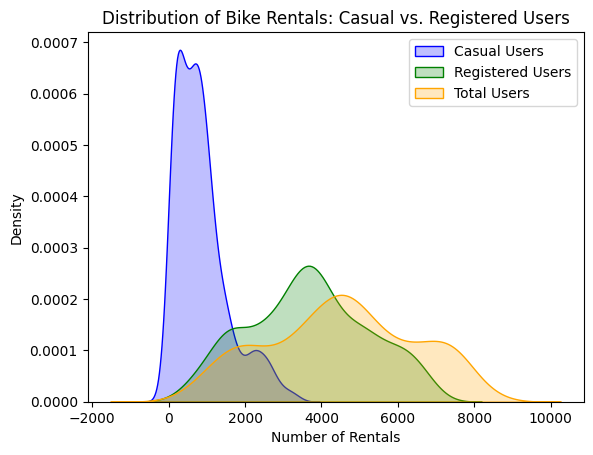

In [196]:
sns.kdeplot(day_df['casual'], fill=True, label='Casual Users', color='blue')
sns.kdeplot(day_df['registered'], fill=True, label='Registered Users', color='green')
sns.kdeplot(day_df['cnt'], fill=True, label="Total Users", color='orange')
plt.title("Distribution of Bike Rentals: Casual vs. Registered Users")
plt.xlabel("Number of Rentals")
plt.ylabel("Density")
plt.legend()

#### **Bike rentals over time by season**

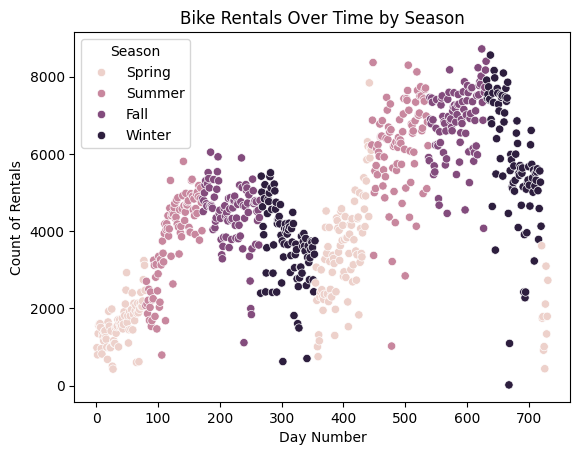

In [179]:
scatter = sns.scatterplot(day_df,x="instant",y="cnt",hue=day_df["season"])
handles, _ = scatter.get_legend_handles_labels()
plt.title("Bike Rentals Over Time by Season")
plt.xlabel("Day Number")
plt.ylabel("Count of Rentals")
plt.legend(handles=handles, title="Season", labels=["Spring", "Summer", "Fall", "Winter"])

#### **Bike rentals per weekdays**

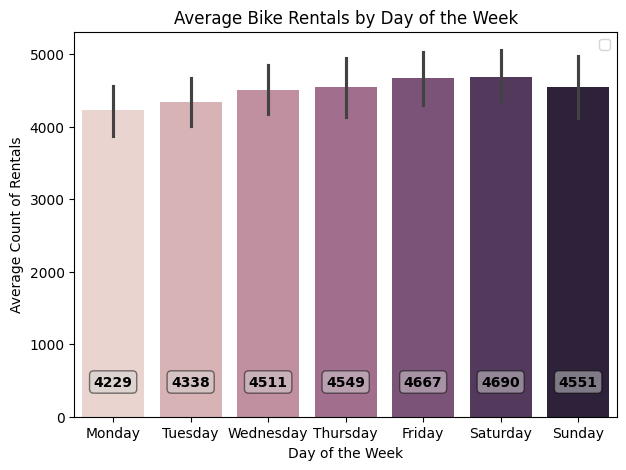

In [180]:
plt.figure(figsize=(7,5))
barplot = sns.barplot(data=day_df, x="weekday", y="cnt", hue=day_df["weekday"])
plt.title("Average Bike Rentals by Day of the Week")
plt.xticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Day of the Week")
plt.ylabel("Average Count of Rentals")
plt.legend([], [])

y_min = plt.gca().get_ylim()[0]

# Annotate each bar with a constant y-position, adding a rounded rectangle box with shading
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than zero
        barplot.annotate(f'{height:.0f}', 
                         (p.get_x() + p.get_width() / 2., y_min),
                         ha='center', va='center', 
                         fontsize=10, color='black', 
                         fontweight='bold',  # Make the font bold
                         xytext=(0, 25),  # No additional offset needed
                         textcoords='offset points',
                         bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray", alpha=0.5))

#### **Bike rentals by temperature**

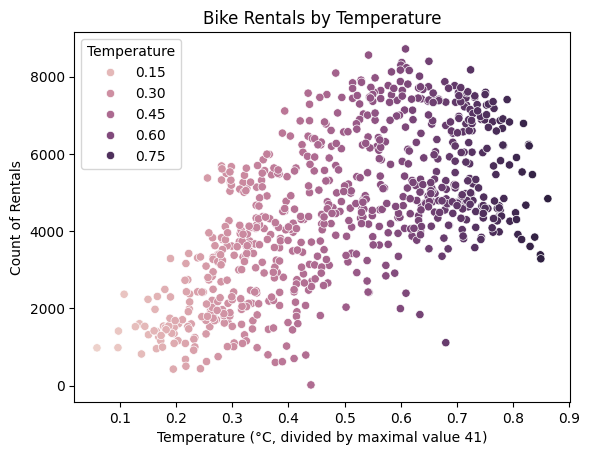

In [201]:
sns.scatterplot(day_df,x="temp",y="cnt",hue=day_df["temp"])
plt.title("Bike Rentals by Temperature")
plt.xlabel("Temperature (°C, divided by maximal value 41)")
plt.ylabel("Count of Rentals")
plt.legend(title="Temperature")

Text(15.875000000000009, 0.5, 'Count of Rentals')

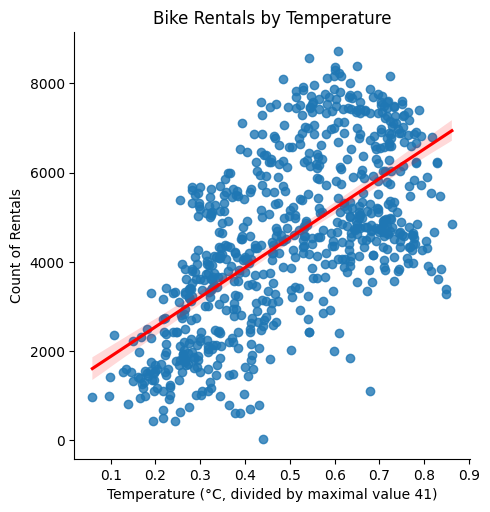

In [216]:
sns.lmplot(data=day_df, x="temp", y="cnt",aspect=1, line_kws={'color': 'red'})
plt.title("Bike Rentals by Temperature")
plt.xlabel("Temperature (°C, divided by maximal value 41)")
plt.ylabel("Count of Rentals")

#### **Bike rentals by temperature felt**

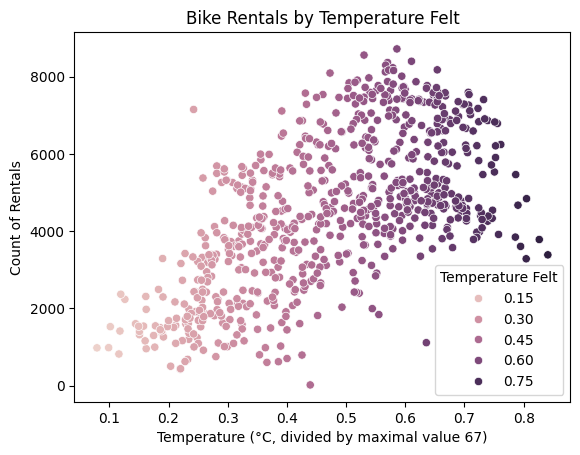

In [213]:
sns.scatterplot(day_df,x="atemp",y="cnt",hue=day_df["atemp"])
plt.title("Bike Rentals by Temperature Felt")
plt.xlabel("Temperature (°C, divided by maximal value 67)")
plt.ylabel("Count of Rentals")
plt.legend(title="Temperature Felt")

Text(15.875000000000009, 0.5, 'Count of Rentals')

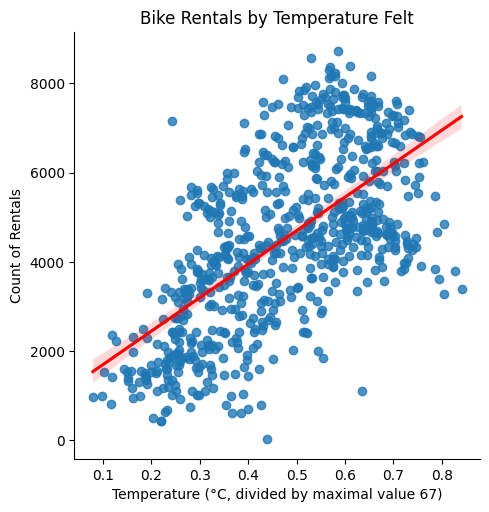

In [217]:
sns.lmplot(data=day_df, x="atemp", y="cnt",aspect=1, line_kws={'color': 'red'})
plt.title("Bike Rentals by Temperature Felt")
plt.xlabel("Temperature (°C, divided by maximal value 67)")
plt.ylabel("Count of Rentals")

Clear correlation between temperature and bike rental amount (shocking)

#### **Bike rentals by humidity**

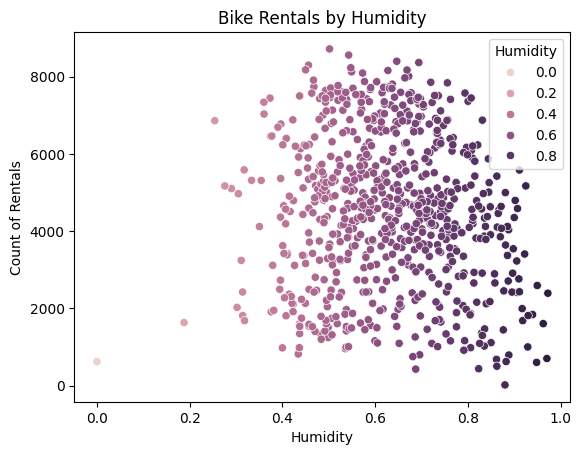

In [203]:
sns.scatterplot(day_df,x="hum",y="cnt",hue=day_df["hum"])
plt.title("Bike Rentals by Humidity")
plt.xlabel("Humidity")
plt.ylabel("Count of Rentals")
plt.legend(title="Humidity")

Text(15.875000000000009, 0.5, 'Count of Rentals')

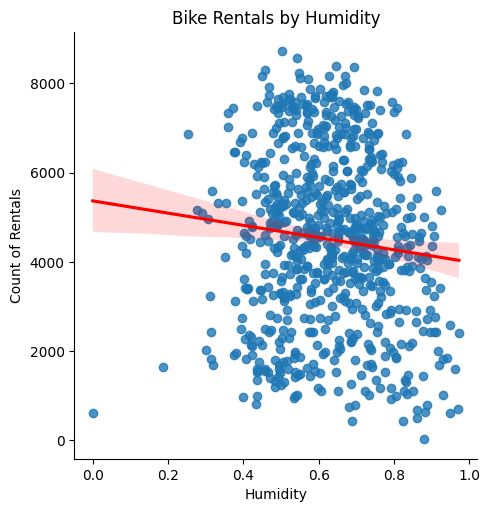

In [210]:
sns.lmplot(data=day_df, x="hum", y="cnt",aspect=1, line_kws={'color': 'red'})
plt.title("Bike Rentals by Humidity")
plt.xlabel("Humidity")
plt.ylabel("Count of Rentals")

#### **Bike rentals by weather conditions**

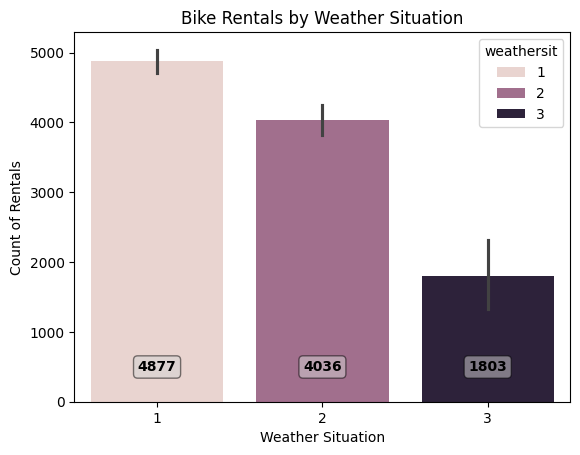

In [182]:
barplot = sns.barplot(data=day_df, x="weathersit", y="cnt", hue=day_df["weathersit"])
plt.title("Bike Rentals by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Count of Rentals")

y_min = plt.gca().get_ylim()[0]

# Annotate each bar with a constant y-position, adding a rounded rectangle box with shading
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than zero
        barplot.annotate(f'{height:.0f}', 
                         (p.get_x() + p.get_width() / 2., y_min),
                         ha='center', va='center', 
                         fontsize=10, color='black', 
                         fontweight='bold',  # Make the font bold
                         xytext=(0, 25),  # No additional offset needed
                         textcoords='offset points',
                         bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray", alpha=0.5))

#### **Bike rental depending on wether the days are holidays or not**

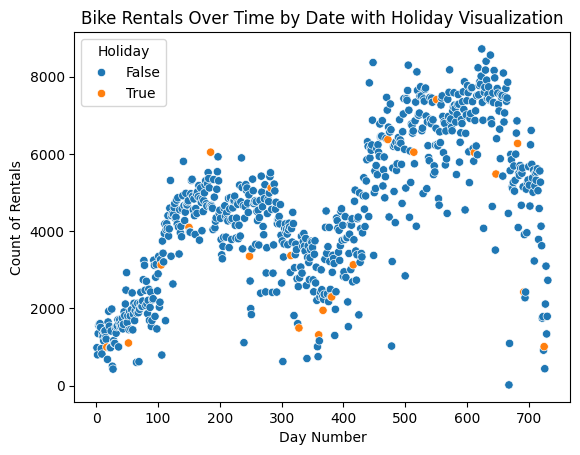

In [183]:
scatter = sns.scatterplot(day_df,x="instant",y="cnt",hue=day_df["holiday"])
handles, _ = scatter.get_legend_handles_labels()
plt.title("Bike Rentals Over Time by Date with Holiday Visualization")
plt.xlabel("Day Number")
plt.ylabel("Count of Rentals")
plt.legend(handles=handles, title="Holiday", labels=["False","True"])

No clear influence of holidays on the bike rental amount

### <span style="color:lightcyan">**Focus on Hours**</span>

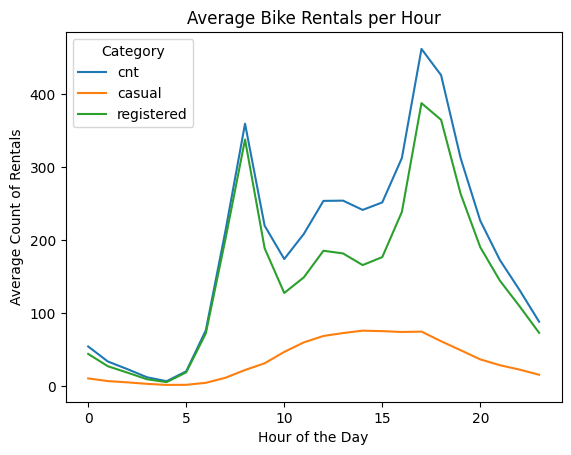

In [184]:
hourly_rentals = hour_df.groupby("hr")["cnt"].mean()
hourly_casual =  hour_df.groupby("hr")["casual"].mean()
hourly_registered =  hour_df.groupby("hr")["registered"].mean()
hourly_rentals.plot(kind='line')
hourly_casual.plot(kind='line')
hourly_registered.plot(kind='line')
plt.title("Average Bike Rentals per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Count of Rentals")
plt.legend(title="Category")
plt.grid(False)

### <span style="color:lightcyan">**Correlation Analysis**</span>

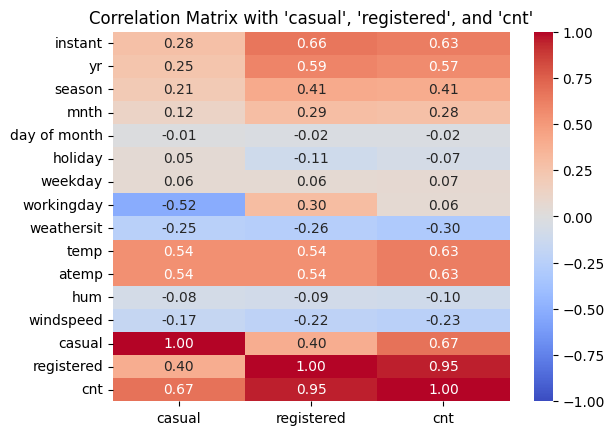

In [190]:
correlation_matrix = day_df.corr()
# Keep only the correlations with 'casual', 'registered', and 'cnt'
filtered_corr_matrix = correlation_matrix.loc[:, ['casual', 'registered', 'cnt']].copy()

sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix with 'casual', 'registered', and 'cnt'")
plt.show()

## <span style="color:powderblue">**Data Analysis**</span>

## <span style="color:powderblue">**Machine Learning**</span>